This notebook will report the findings of creating a decision tree model on a binary version of the Boston housing dataset. For reference:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft .
3. INDUS: proportion of non retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full value property tax rate per 10,000
11. PTRATIO: pupil teacher ratio by town
12. B: 1000(Bk 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: percent lower status of the population
14. MEDV: Median value of owner occupied homes in 1000's

Note that in this dataset, an instance has a median house value of 1 if the median house value is greater than 230k and 0 if it is not.

First we must load the dataset.

In [1]:
housing<-read.table("housing.header.binary.txt", header=TRUE, sep=",")
colnames(housing)<-c("Crim", "Zn", "Indus", "Chas", "Nox", "Rm", "Age", "Dis", "Rad", "Tax", "Ptratio", "B", "Lstat", "Medv")
summary(housing)

      Crim                Zn             Indus            Chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      Nox               Rm             Age              Dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      Rad              Tax 

We will use the Crim index and number of rooms in a building as independent variables to train an RPART decision tree that predicts whether the median house value is 0 or 1.

In [2]:
library(rpart)
fit<-rpart(Medv~Crim+Rm, method="class", data=housing)
summary(fit)

Call:
rpart(formula = Medv ~ Crim + Rm, data = housing, method = "class")
  n= 506 

          CP nsplit rel error    xerror       xstd
1 0.51546392      0 1.0000000 1.0000000 0.05637690
2 0.05670103      1 0.4845361 0.5206186 0.04634589
3 0.01546392      2 0.4278351 0.4639175 0.04433951
4 0.01374570      5 0.3814433 0.5257732 0.04651722
5 0.01030928      8 0.3402062 0.5103093 0.04599788
6 0.01000000     11 0.3041237 0.5154639 0.04617278

Variable importance
  Rm Crim 
  69   31 

Node number 1: 506 observations,    complexity param=0.5154639
  predicted class=0  expected loss=0.3833992  P(node) =1
    class counts:   312   194
   probabilities: 0.617 0.383 
  left son=2 (362 obs) right son=3 (144 obs)
  Primary splits:
      Rm   < 6.5455   to the left,  improve=86.60421, (0 missing)
      Crim < 0.66771  to the right, improve=30.94264, (0 missing)
  Surrogate splits:
      Crim < 0.0273   to the right, agree=0.739, adj=0.083, (0 split)

Node number 2: 362 observations,    complexity 

Next we visualize the tree:

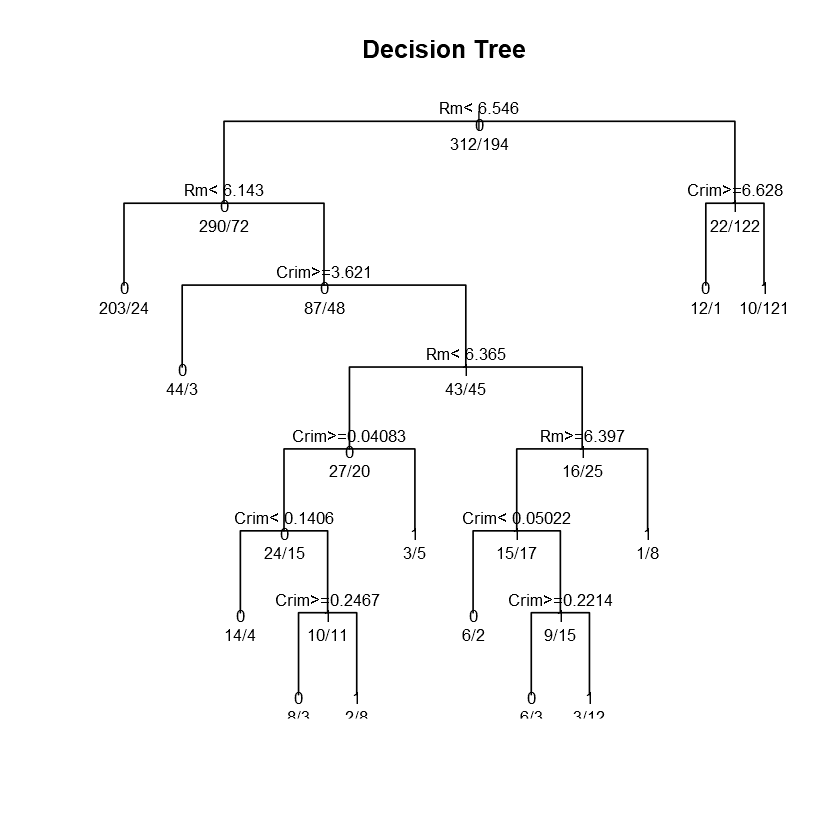

In [3]:
plot(fit, uniform=TRUE, main="Decision Tree")
text(fit, use.n=TRUE, all=TRUE, cex=.8)

The above decision tree looks at each instance and performs the following splits:

Root node-Is Rm<6.546?

312 instances were split as negatives, and 194 were split as positives.

Traversing the left subtree, we ask:

Is Rm < 6.143?

290 instances were split as negatives, and 72 were split as positives.

Continuing down the left subtree, we have a class label of 0 in response to an answer of 0 to the above question. Here we have 203 instances that were true negatives and 24 that were not.

Traversing the right subtree from the above node, we ask:

Is Crim>=3.621?

87 instances were split as negatives, and 48 were split as positives.

Moving left from here, we have a class label of 0 in response to an answer of 0 to the above question. Here we have 44 instances that were true negatives and 3 that were not.

Traversing the right subtree from the above node, we ask:

Is Rm > 6.365?

43 instances were split as negatives, and 45 were split as positives.

Traversing the left subtree from this node, we ask:

Is Crim >=0.0483?

27 instances were split as negatives, and 20 were split as positives.

Moving right from here, we have a class label of 1 in response to an answer of 1 to the above question. Here we have 5 instances that were true positives and 3 that were not.

The above described process can be used for each decision node to eventually reach a leaf node.